# Installation

In [1]:
!conda install pandas -y
!conda install -c conda-forge matplotlib -y
!conda install seaborn -y
!conda install scipy -y
!conda install anaconda::openpyxl -y
!conda install anaconda::jinja2 -y

# Importing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, mannwhitneyu, ttest_ind, levene, spearmanr, rankdata

# Preprocessing

In [2]:
df = pd.read_excel('dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no.        60 non-null     int64 
 1   sex        60 non-null     object
 2   college    60 non-null     object
 3   format     60 non-null     object
 4   md         60 non-null     int64 
 5   pd         60 non-null     int64 
 6   td         60 non-null     int64 
 7   pf         60 non-null     int64 
 8   ef         60 non-null     int64 
 9   fr         60 non-null     int64 
 10  arq1a      60 non-null     object
 11  arq1b      19 non-null     object
 12  arq2a      60 non-null     object
 13  arq2b      9 non-null      object
 14  arq3a      60 non-null     object
 15  arq3b      16 non-null     object
 16  arq4a      60 non-null     object
 17  arq4b      14 non-null     object
 18  arq5a      60 non-null     object
 19  arq5b      10 non-null     object
 20  arq6a      60 non-null     object


In [3]:
df

,no.,sex,college,format,md,pd,td,pf,ef,fr,...,qual1,qual2,qual3,recall,interpret,compre,lb,duration,ctrlf,annotated
0,1,Female,COB,Print,75,40,75,85,85,45,...,I take less time when reading electronically,good lighting and a comfortable table and chair,Have a mouse/apple pencil to make it easier to...,4,3,7,1,513,Not Applicable,No
1,2,Male,CCS,Screen,50,5,35,100,15,40,...,"Generally speaking, I generally like reading w...","Reading in a nice quiet area, with adequate li...",Use a dedicated reading app that allows you to...,5,3,8,14,763,No,No
2,3,Male,CCS,Print,50,10,30,90,30,10,...,My preference of electronic over printed is mo...,Its always better to be sitting up right on a ...,Not much that is not already in place i.e. zoo...,4,2,6,3,676,Not Applicable,No
3,4,Male,CCS,Print,75,60,25,80,65,30,...,"I hate reading, but for the times that I need ...","Depending on the paper, but usually diagrams a...",I prefer to have NotebookLLM or ChatGPT by the...,4,2,6,1,307,Not Applicable,No
4,5,Male,CCS,Print,95,25,0,100,50,0,...,I don't like reading academic papers I just re...,if i have a very delicious meal like steak and...,some way to automatically stop all of my effor...,4,3,7,1,320,Not Applicable,No
5,6,Male,CCS,Screen,80,15,15,95,15,70,...,I find well formatted and clear electronic mat...,I prefer to have the pages ordered correctly a...,I like to have a larger screen size as my eyes...,4,5,9,1,282,Yes,No
6,7,Male,CCS,Screen,45,5,50,70,55,50,...,"For me, I try to read on my tablet to replicat...","I usually, off my devices or DND, also I try t...",none comes to mind,5,4,9,11,592,Yes,Yes
7,8,Female,CLA,Screen,80,55,55,40,40,20,...,"Whenever I have to study for my majors, I make...",It's really important that when you read on pa...,My biggest factor when reading on laptop is th...,3,3,6,10,873,No,No
8,9,Male,CCS,Print,0,50,40,100,75,15,...,Heading bullets on the left side of the pdf. T...,Bold face text for important terminnologies. F...,Focus mode changing the font style and the bac...,3,2,5,0,325,Not Applicable,Yes
9,10,Male,CCS,Print,55,5,70,100,60,25,...,"If we are factoring in the convenience factor,...",Having writing materials and a place to take n...,"To read well on a laptop, turn on do not distu...",4,5,9,2,343,Not Applicable,Yes


In [4]:
df.describe()

,no.,md,pd,td,pf,ef,fr,recall,interpret,compre,lb,duration
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,61.083333,23.166667,45.833333,76.333333,61.000000,32.250000,4.100000,3.150000,7.250000,10.283333,616.733333
std,17.464249,21.883584,22.567538,25.564254,19.869632,22.451454,26.608031,0.817188,1.204863,1.693707,10.473682,249.814498
min,1.000000,0.000000,0.000000,0.000000,20.000000,15.000000,0.000000,2.000000,0.000000,3.000000,0.000000,224.000000
25%,15.750000,45.000000,5.000000,25.000000,65.000000,48.750000,10.000000,4.000000,2.000000,6.000000,2.000000,412.500000
50%,30.500000,67.500000,15.000000,50.000000,80.000000,65.000000,25.000000,4.000000,3.000000,7.500000,7.000000,584.500000
75%,45.250000,76.250000,30.000000,65.000000,90.000000,75.000000,50.000000,5.000000,4.000000,8.250000,14.250000,786.000000
max,60.000000,100.000000,80.000000,95.000000,100.000000,100.000000,100.000000,5.000000,5.000000,10.000000,41.000000,1161.000000


In [5]:
mapping = {
    'Strongly Disagree': -2,
    'Disagree': -1,
    'Depends': 0,
    'Agree': 1,
    'Strongly Agree': 2
}

r_mapping = {
    'Strongly Disagree': 2,
    'Disagree': 1,
    'Depends': 0,
    'Agree': -1,
    'Strongly Agree': -2
}

reverse_qs = [2,6,8,11,12,14]

arq_quanti_labels = [f"arq{i+1}a" for i in range(14)]
for i, label in enumerate(arq_quanti_labels):
    if (i + 1) in reverse_qs:
        print(i + 1, "reversed")
    df[label] = df[label].map(r_mapping if (i + 1) in reverse_qs else mapping)

2 reversed
6 reversed
8 reversed
11 reversed
12 reversed
14 reversed


In [6]:
print_readers = df[df['format'] == 'Print'].reset_index().iloc[:,1:]
screen_readers = df[df['format'] == 'Screen'].reset_index().iloc[:,1:]

quanti_labels = ['no.', 'md', 'pd', 'td', 'pf', 'ef', 'fr'] + arq_quanti_labels + ['recall', 'interpret', 'compre', 'lb', 'duration']
print_readers_quanti = print_readers[quanti_labels]
screen_readers_quanti = screen_readers[quanti_labels]

In [7]:
print(print_readers_quanti.isna().any().any())
print(screen_readers_quanti.isna().any().any())

False
False


# Participants

In [8]:
colleges = df['college'].value_counts().reset_index()
sex = df['sex'].value_counts().reset_index()

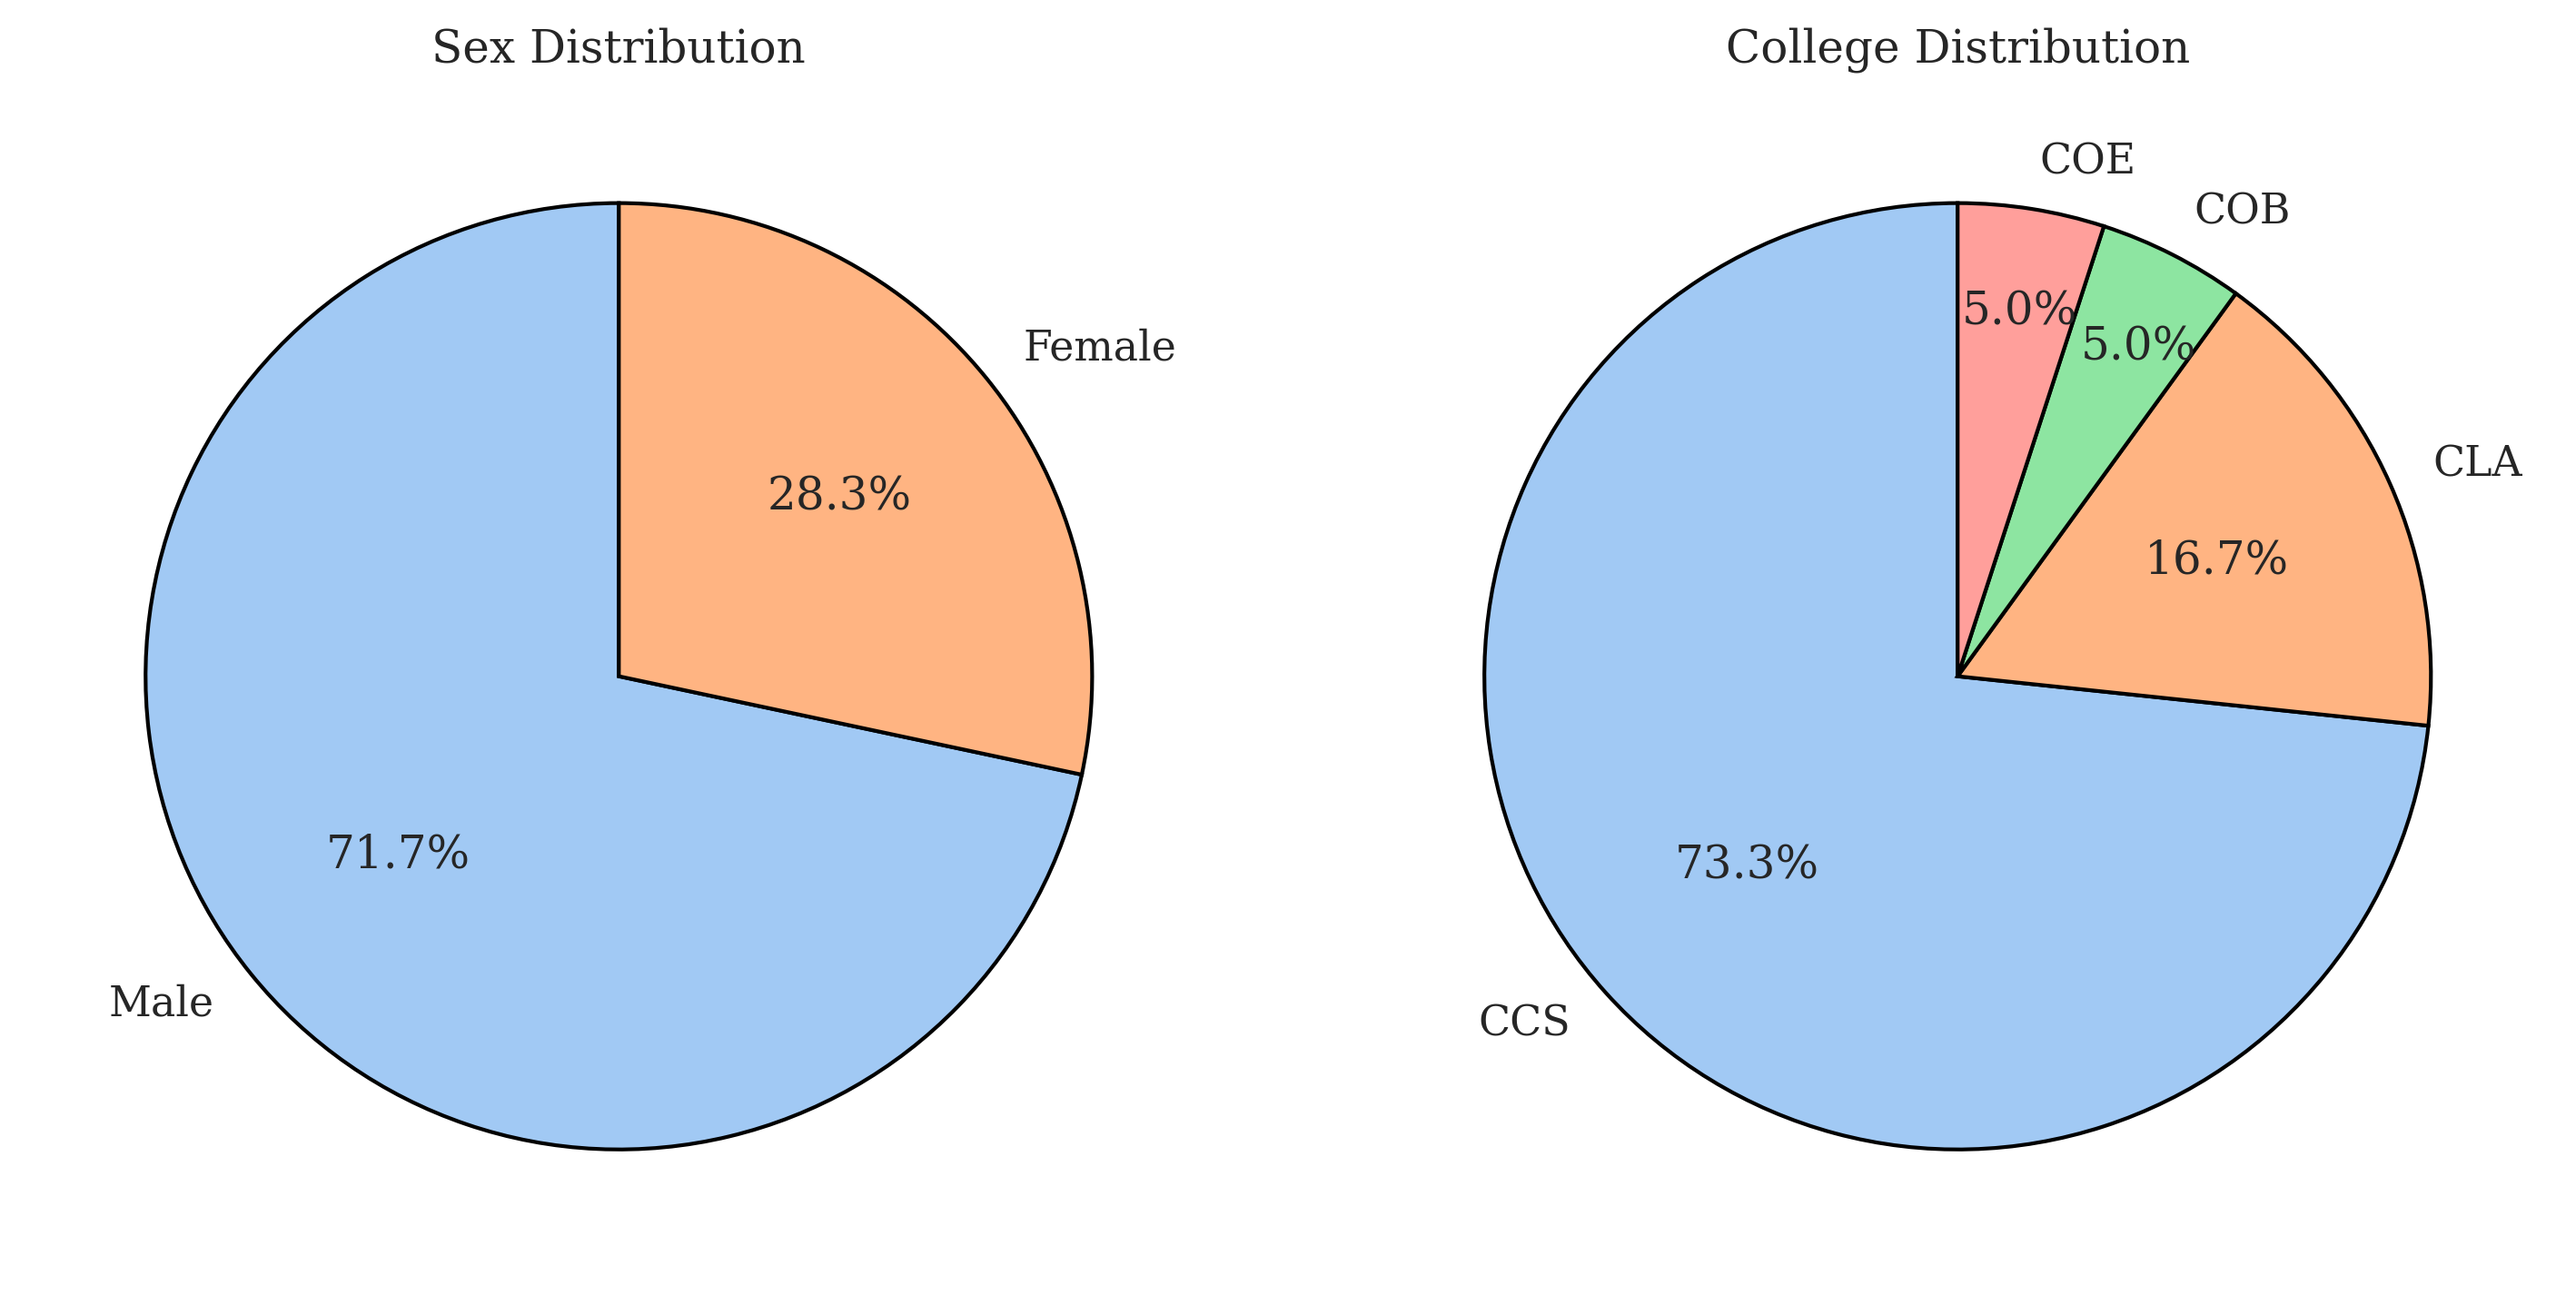

In [59]:
plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 14

fig = plt.figure(figsize=(10, 5), dpi=300)

# --- Pie 1 ---
ax1 = fig.add_subplot(1, 2, 1)
wedges1, texts1, autotexts1 = ax1.pie(
    sex['count'],
    labels=sex['sex'],
    colors=sns.color_palette('pastel'),
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
ax1.set_title('Sex Distribution', fontsize=12)

# --- Pie 2 ---
ax2 = fig.add_subplot(1, 2, 2)
wedges2, texts2, autotexts2 = ax2.pie(
    colleges['count'],
    labels=['CCS','CLA','COB','COE'],
    colors=sns.color_palette('pastel'),
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'linewidth': 1, 'edgecolor': 'black'}
)
ax2.set_title('College Distribution', fontsize=12)

# Move only the last two percentage labels (COB and COE) outward
for i in [-2, -1]:  # indices of last two wedges
    x, y = autotexts2[i].get_position()
    autotexts2[i].set_position((x * 1.4, y * 1.3))  # move outward (adjust factor as needed)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(
    'demographic.png',
    dpi=300,
    bbox_inches='tight',
    pad_inches=0.3
)
plt.show()

# Distribution Check

## NASA-TLX Distribution

In [10]:
nasa_tlx = df[['format', 'md', 'pd', 'td', 'pf', 'ef', 'fr']] 

NASA TLX grouped according to Format

In [11]:
nasa_tlx.groupby('format').describe().T

format         Print      Screen
md count   30.000000   30.000000
   mean    63.833333   58.333333
   std     24.589153   18.815499
   min      0.000000   15.000000
   25%     51.250000   45.000000
   50%     70.000000   60.000000
   75%     78.750000   73.750000
   max    100.000000   85.000000
pd count   30.000000   30.000000
   mean    23.666667   22.666667
   std     22.511810   22.996751
   min      0.000000    0.000000
   25%      6.250000    5.000000
   50%     17.500000   15.000000
   75%     30.000000   30.000000
   max     75.000000   80.000000
td count   30.000000   30.000000
   mean    45.833333   45.833333
   std     24.951102   26.590228
   min      0.000000    0.000000
   25%     26.250000   21.250000
   50%     50.000000   50.000000
   75%     65.000000   65.000000
   max     95.000000   90.000000
pf count   30.000000   30.000000
   mean    77.333333   75.333333
   std     21.684785   18.191194
   min     20.000000   30.000000
   25%     65.000000   70.000000
   50%     82.500000   75.000000
   75%     93.750000   90.000000
   max    100.000000  100.000000
ef count   30.000000   30.000000
   mean    61.500000   60.500000
   std     20.684410   24.436759
   min     20.000000   15.000000
   25%     50.000000   47.500000
   50%     65.000000   65.000000
   75%     73.750000   78.750000
   max    100.000000   95.000000
fr count   30.000000   30.000000
   mean    29.500000   35.000000
   std     26.695925   26.684620
   min      0.000000    0.000000
   25%     10.000000   16.250000
   50%     22.500000   27.500000
   75%     40.000000   53.750000
   max    100.000000   85.000000

In [12]:
nasa_tlx.groupby('format').median()

,md,pd,td,pf,ef,fr
format,,,,,,
Print,70.0,17.5,50.0,82.5,65.0,22.5
Screen,60.0,15.0,50.0,75.0,65.0,27.5


NASA TLX no group

In [13]:
nasa_tlx.describe()

,md,pd,td,pf,ef,fr
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,61.083333,23.166667,45.833333,76.333333,61.000000,32.250000
std,21.883584,22.567538,25.564254,19.869632,22.451454,26.608031
min,0.000000,0.000000,0.000000,20.000000,15.000000,0.000000
25%,45.000000,5.000000,25.000000,65.000000,48.750000,10.000000
50%,67.500000,15.000000,50.000000,80.000000,65.000000,25.000000
75%,76.250000,30.000000,65.000000,90.000000,75.000000,50.000000
max,100.000000,80.000000,95.000000,100.000000,100.000000,100.000000


In [14]:
nasa_tlx.iloc[:, 1:].median()

md    67.5
pd    15.0
td    50.0
pf    80.0
ef    65.0
fr    25.0
dtype: float64

NASA TLX Visualization

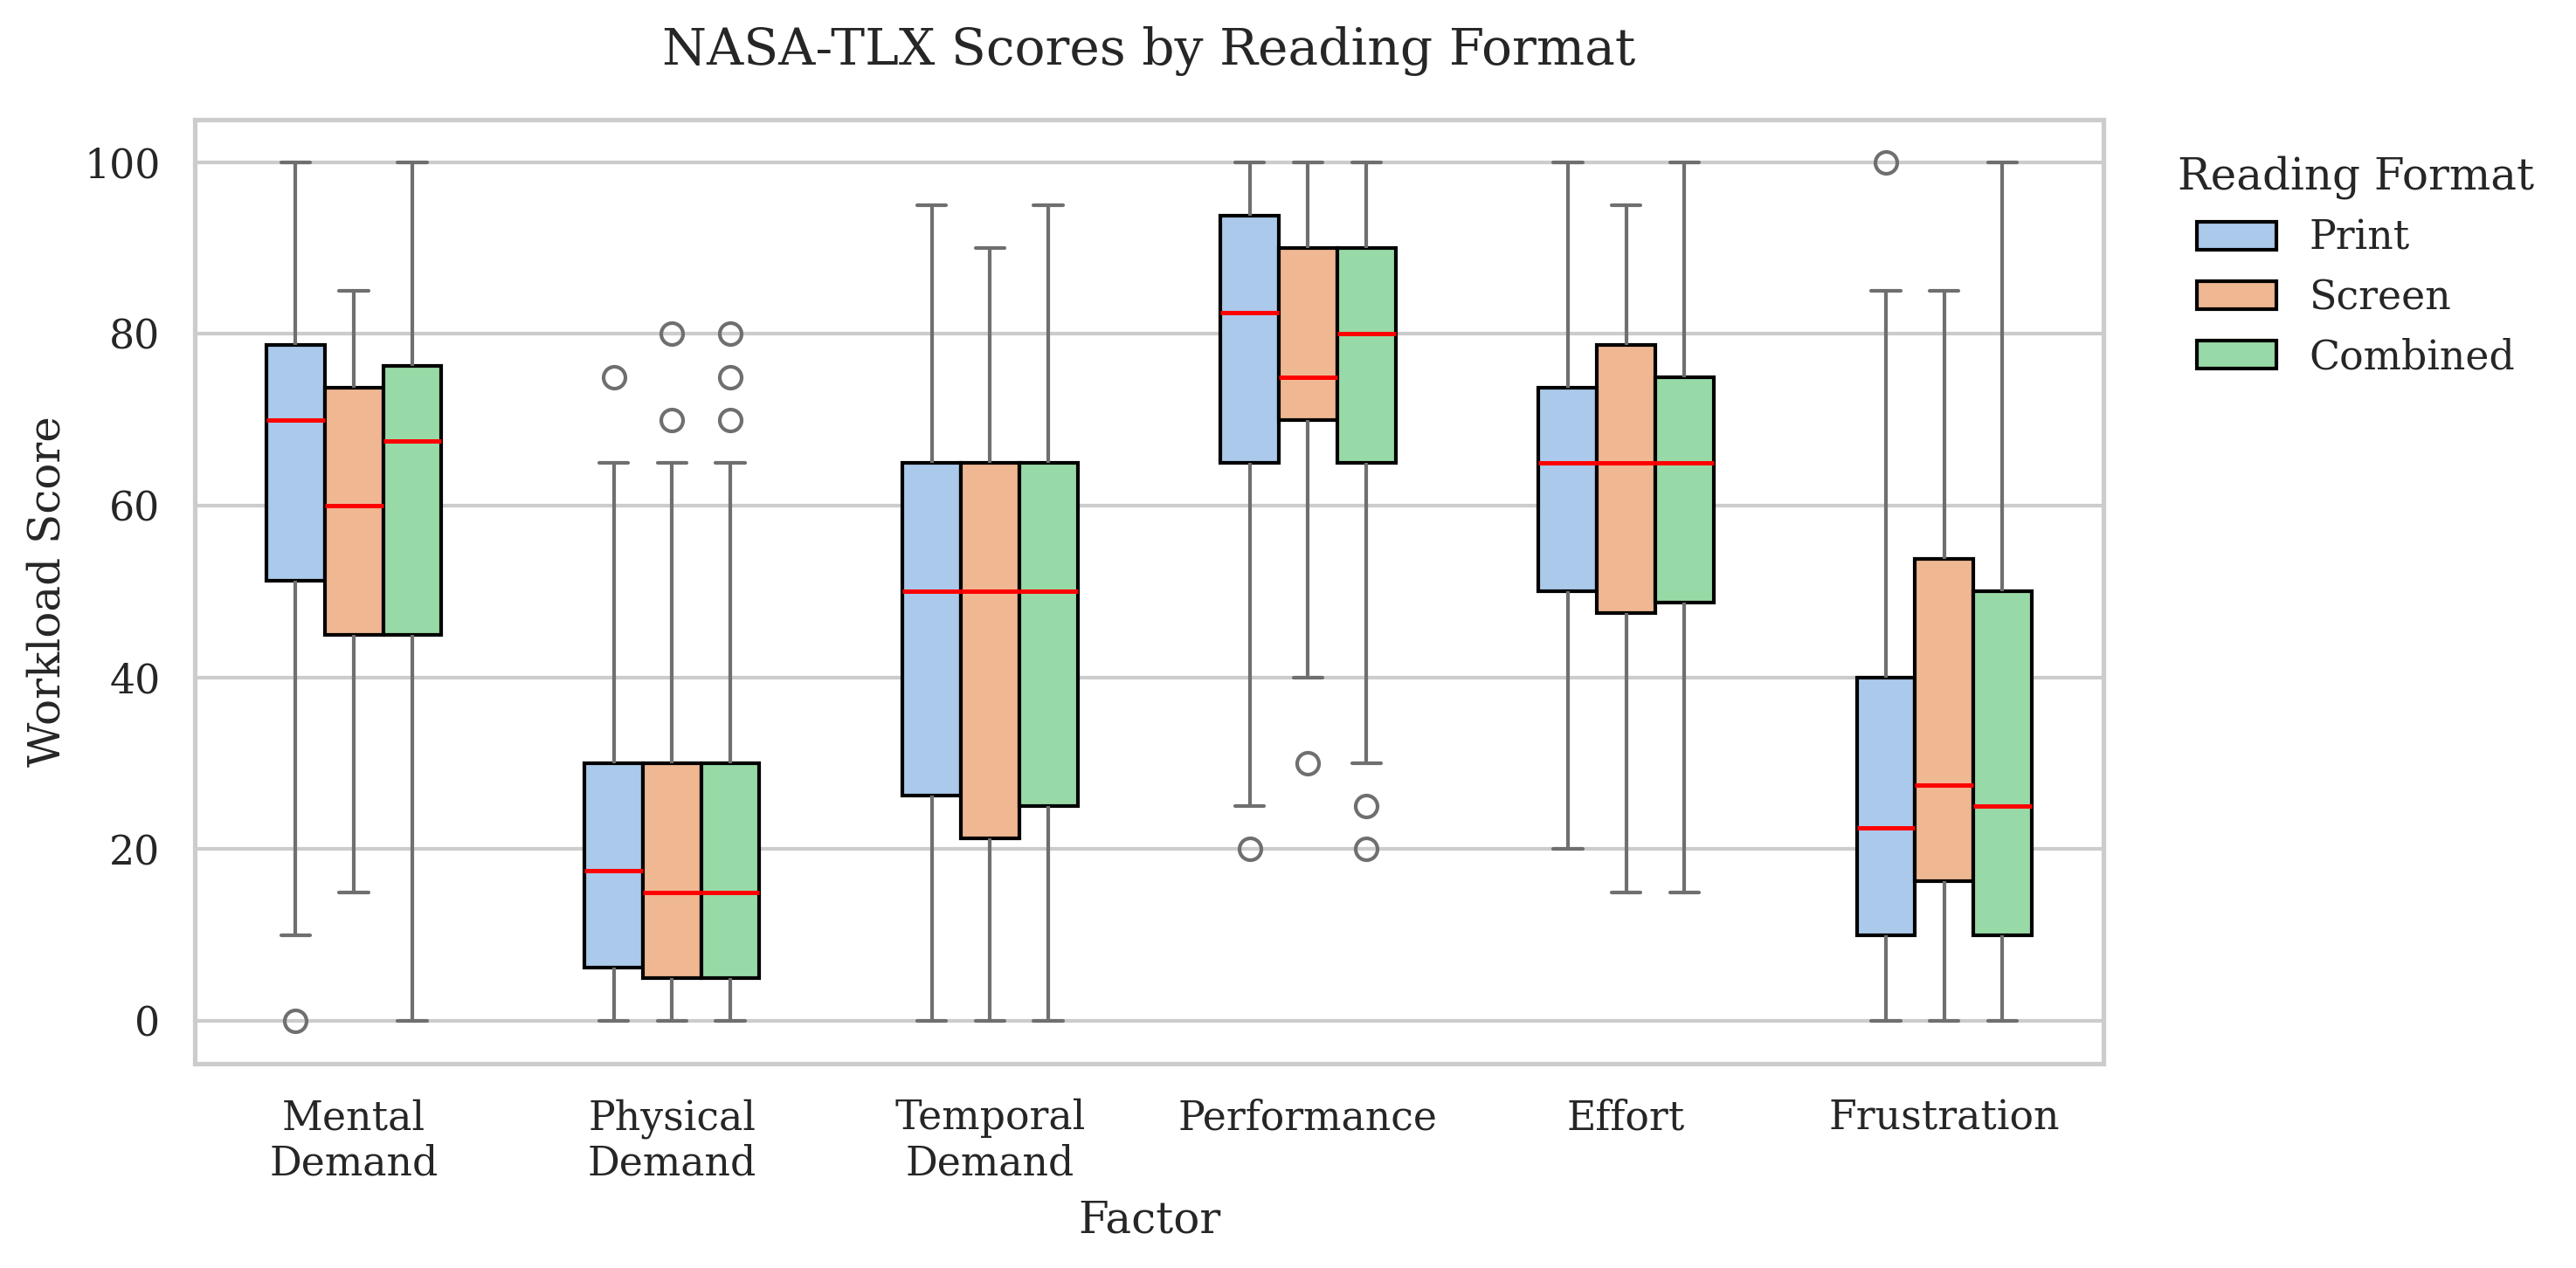

In [71]:
# Example: combined dataset
nasa_tlx_long = df.melt(
    id_vars=['format'],
    value_vars=['md', 'pd', 'td', 'pf', 'ef', 'fr'], 
    var_name='factor', 
    value_name='load'
)
nasa_tlx_long_2 = nasa_tlx_long.copy()
nasa_tlx_long_2['format'] = 'Combined'
nasa_tlx_long_combined = pd.concat([nasa_tlx_long, nasa_tlx_long_2])

# ACM CHI formatting
plt.figure(figsize=(10, 5), dpi=300)
sns.set_theme(style="whitegrid")
# === Enable LaTeX font rendering ===

plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 14

# Boxplot
ax = sns.boxplot(
    x='factor',
    y='load',
    hue='format',
    data=nasa_tlx_long_combined,
    palette='pastel',
    medianprops={'color': 'red', 'linewidth': 1.2},
    boxprops={'edgecolor': 'black'},
    width=0.55
)

# --- Add mean markers ---
# # Compute means
# means = nasa_tlx_long_combined.groupby(['factor','format'])['load'].mean().reset_index()

# # Map x positions for each factor and hue
# hue_order = nasa_tlx_long_combined['format'].unique()
# n_factors = len(nasa_tlx_long_combined['factor'].unique())
# width = 0.55
# for i, factor in enumerate(nasa_tlx_long_combined['factor'].unique()):
#     for j, hue in enumerate(hue_order):
#         mean_val = means[(means['factor']==factor) & (means['format']==hue)]['load'].values[0]
#         # Compute x position
#         n_hues = len(hue_order)
#         x_pos = i - width/2 + j*(width/n_hues) + (width/(2*n_hues))
#         ax.scatter(
#             x_pos, 
#             mean_val, 
#             color='black', 
#             s=80, 
#             marker='x', 
#             zorder=10
#         )

# Legend
plt.legend(
    title='Reading Format',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

# Labels
plt.title('NASA-TLX Scores by Reading Format', pad=15)
plt.ylabel('Workload Score')
plt.xlabel('Factor')
plt.xticks(
    ticks=range(6),
    labels=[
        'Mental\nDemand',
        'Physical\nDemand',
        'Temporal\nDemand',
        'Performance',
        'Effort',
        'Frustration'
    ]
)

plt.tight_layout()
# plt.savefig('NASA_TLX_CHI_Format_with_mean_fixed.pdf', format='pdf', bbox_inches='tight')
plt.savefig('nasa_tlx.png', dpi=300, bbox_inches='tight')
plt.show()

## ARQ Median

In [61]:
learn_engage_cols = [1,7,9,12,13]
format_behave_cols = [2,3,4,5,6,8,10,11,14]

for i, each in enumerate(learn_engage_cols):
    learn_engage_cols[i] = f"arq{learn_engage_cols[i]}a"
for i, each in enumerate(format_behave_cols):
    format_behave_cols[i] = f"arq{format_behave_cols[i]}a"

In [62]:
arq_median_qs = df[arq_quanti_labels].median().reset_index()
arq_median_qs.columns = ['q', 'median']
arq_median_qs

,q,median
0,arq1a,1.0
1,arq2a,-1.0
2,arq3a,-1.0
3,arq4a,0.0
4,arq5a,-1.0
5,arq6a,0.0
6,arq7a,1.0
7,arq8a,-1.0
8,arq9a,0.0
9,arq10a,-1.0


In [63]:
arq_median_samp = df[arq_quanti_labels].mean(axis=1).reset_index()
arq_median_samp['index'] += 1
arq_median_samp.columns = ['no.', 'arq_overall']
arq_median_samp['learn_engage'] = df[learn_engage_cols].mean(axis=1)
arq_median_samp['format_behave'] = df[format_behave_cols].mean(axis=1)
arq_median_samp['format'] = df['format']
arq_median_samp = arq_median_samp[['no.', 'format', 'learn_engage', 'format_behave', 'arq_overall']]
arq_median_samp

,no.,format,learn_engage,format_behave,arq_overall
0,1,Print,-1.4,-1.777778,-1.642857
1,2,Screen,1.4,-0.333333,0.285714
2,3,Print,0.2,-0.777778,-0.428571
3,4,Print,-0.2,-0.555556,-0.428571
4,5,Print,0.8,0.444444,0.571429
5,6,Screen,-1.4,-1.666667,-1.571429
6,7,Screen,0.6,-0.444444,-0.071429
7,8,Screen,1.4,0.666667,0.928571
8,9,Print,0.2,-1.777778,-1.071429
9,10,Print,0.2,-0.222222,-0.071429


ARQ No group

In [64]:
arq_median_samp.iloc[:,2:].describe()

,learn_engage,format_behave,arq_overall
count,60.000000,60.000000,60.000000
mean,0.276667,-0.444444,-0.186905
std,0.876891,0.813930,0.782360
min,-1.600000,-1.777778,-1.642857
25%,-0.200000,-1.111111,-0.785714
50%,0.200000,-0.555556,-0.142857
75%,1.000000,0.027778,0.303571
max,1.800000,1.555556,1.428571


In [65]:
arq_median_samp.iloc[:,2:].median()

learn_engage     0.200000
format_behave   -0.555556
arq_overall     -0.142857
dtype: float64

ARQ grouped according to Format

In [66]:
arq_median_samp.iloc[:,1:].groupby('format').describe().T

format                   Print     Screen
learn_engage  count  30.000000  30.000000
              mean    0.326667   0.226667
              std     0.863806   0.901697
              min    -1.400000  -1.600000
              25%    -0.150000  -0.350000
              50%     0.200000   0.400000
              75%     1.000000   0.950000
              max     1.800000   1.600000
format_behave count  30.000000  30.000000
              mean   -0.444444  -0.444444
              std     0.876348   0.761460
              min    -1.777778  -1.666667
              25%    -1.083333  -1.083333
              50%    -0.555556  -0.500000
              75%     0.194444   0.000000
              max     1.333333   1.555556
arq_overall   count  30.000000  30.000000
              mean   -0.169048  -0.204762
              std     0.817319   0.759350
              min    -1.642857  -1.571429
              25%    -0.714286  -0.785714
              50%    -0.142857  -0.142857
              75%     0.482143   0.285714
              max     1.285714   1.428571

In [67]:
arq_median_samp.iloc[:,1:].groupby('format').median()

,learn_engage,format_behave,arq_overall
format,,,
Print,0.2,-0.555556,-0.142857
Screen,0.4,-0.500000,-0.142857


ARQ Visualization

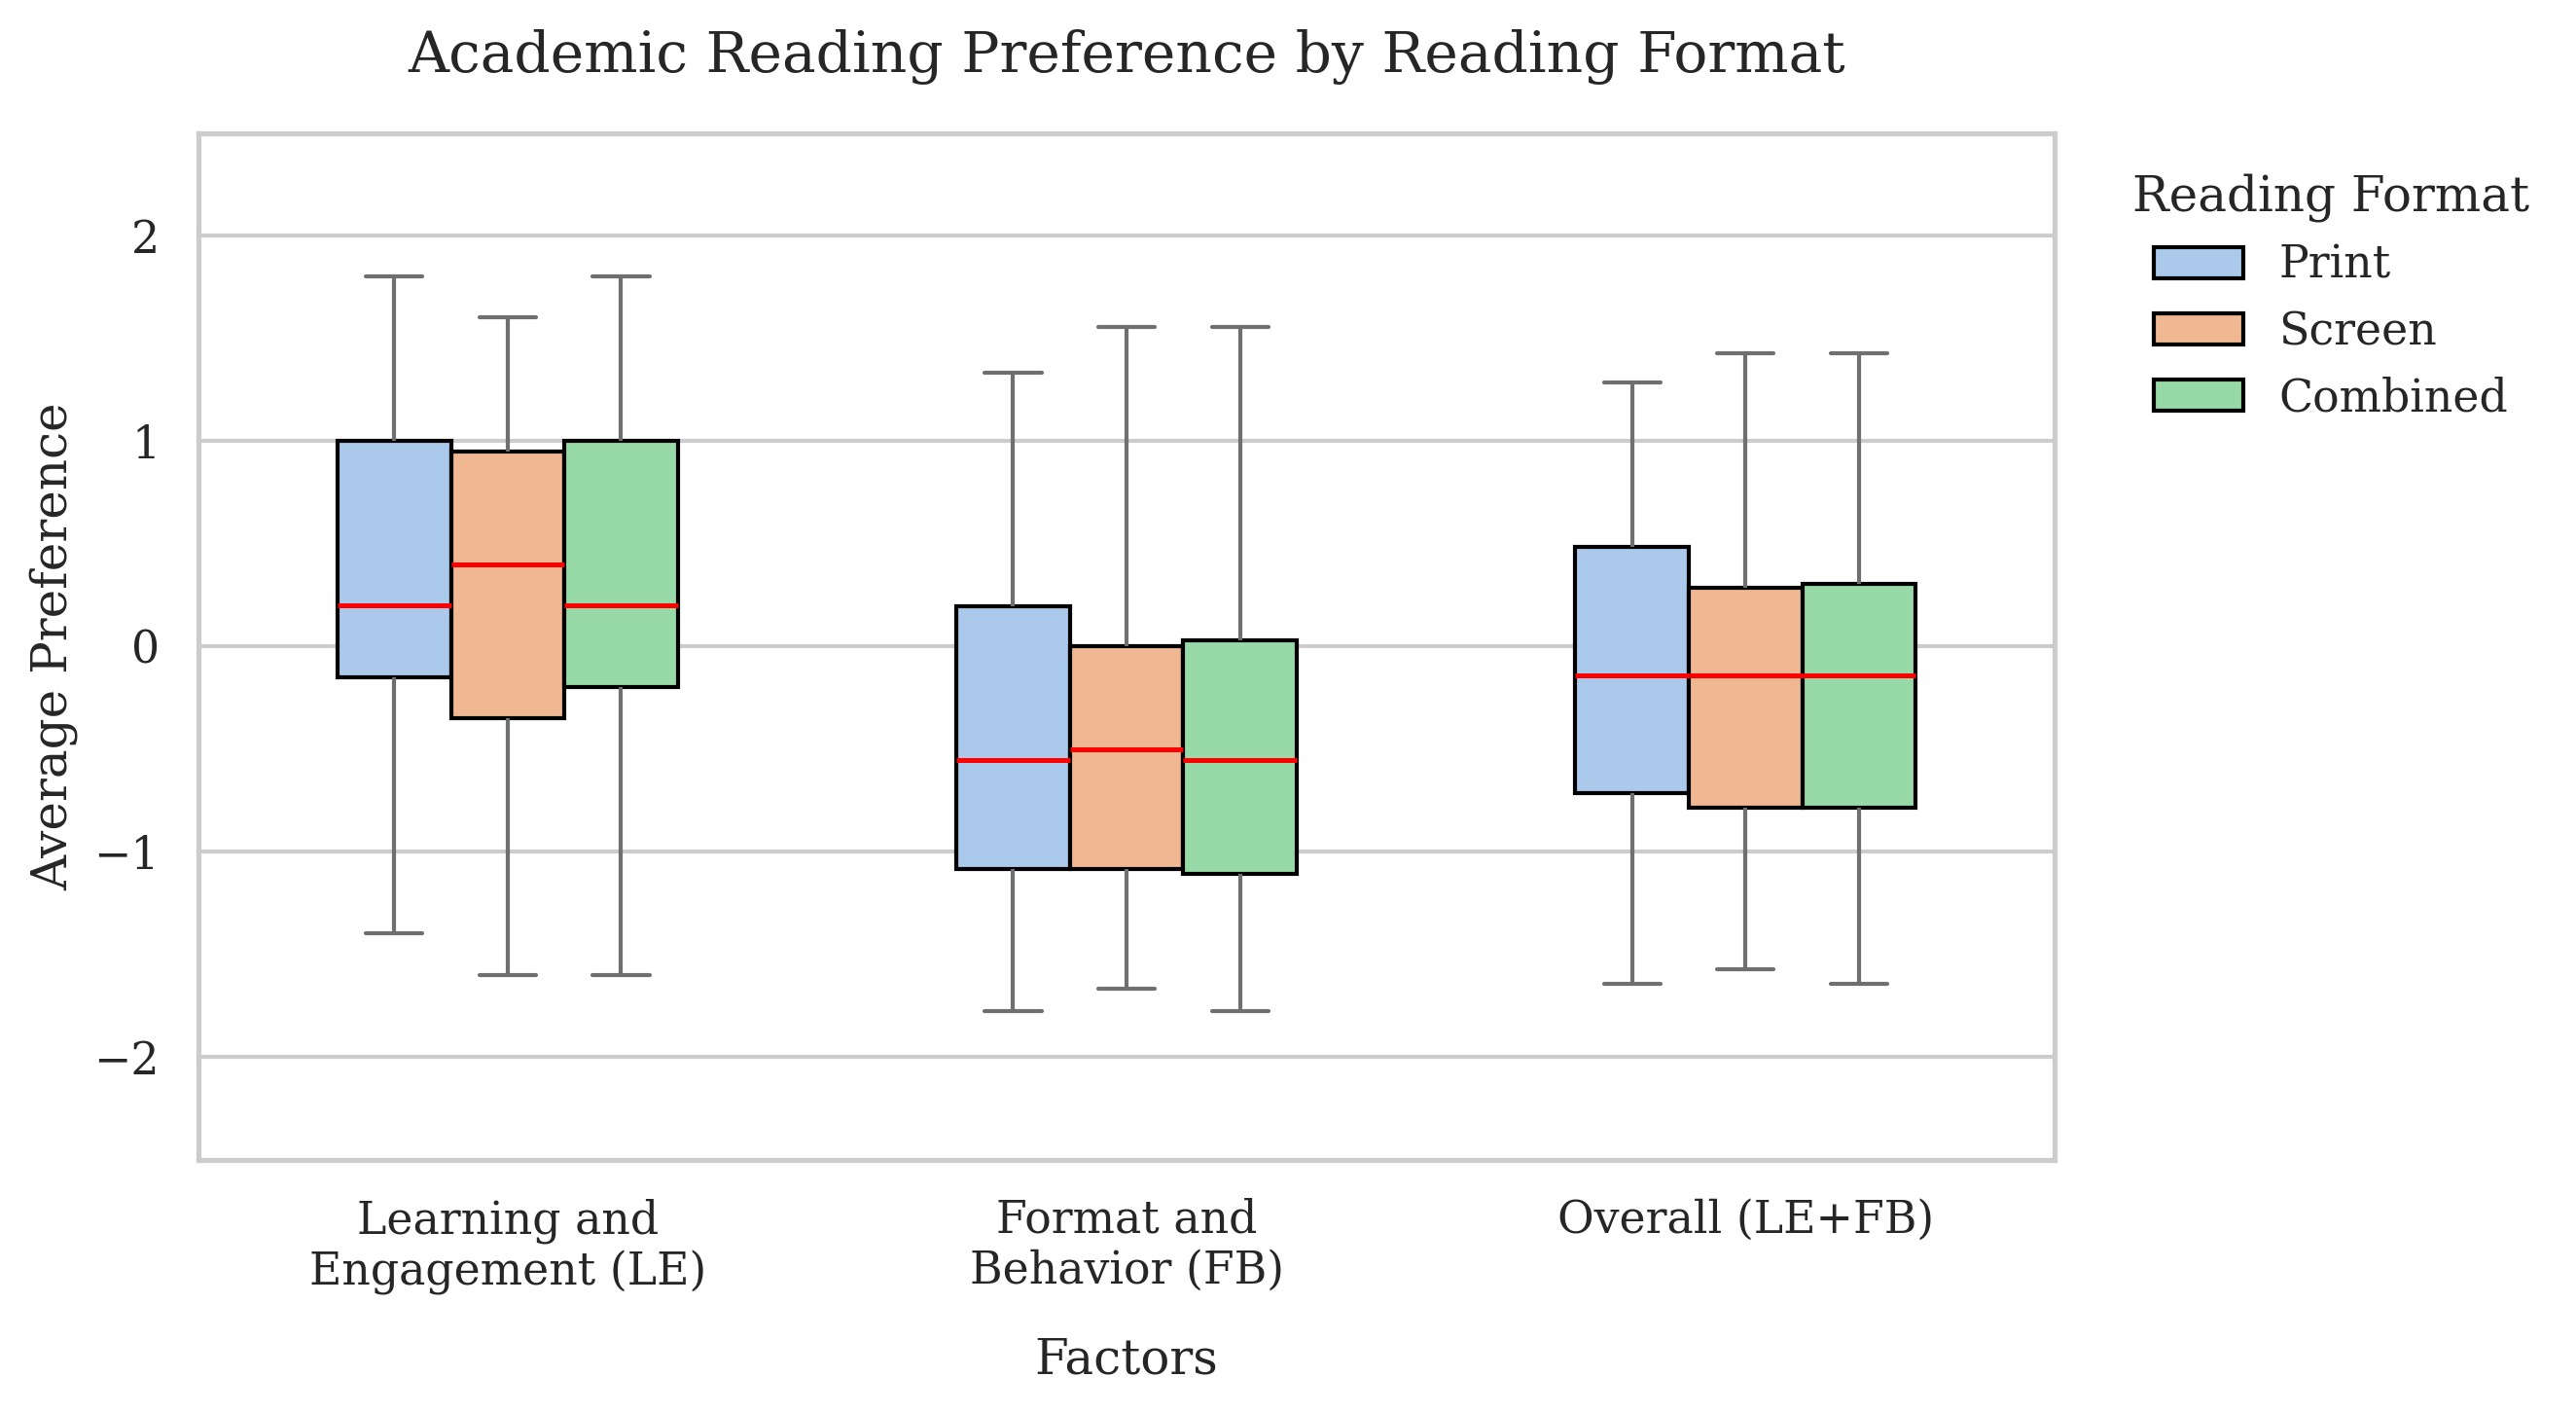

In [72]:
# --- Prepare data ---
arq_median_samp_long = arq_median_samp.melt(
    id_vars=['format'],
    value_vars=['learn_engage', 'format_behave', 'arq_overall'],
    var_name='arq',
    value_name='average'
)

# Add combined row for overall
arq_median_samp_long_2 = arq_median_samp_long.copy()
arq_median_samp_long_2['format'] = 'Combined'
arq_median_long_combined = pd.concat([arq_median_samp_long, arq_median_samp_long_2])

# --- ACM CHI style ---
plt.figure(figsize=(9, 5), dpi=300)
sns.set_theme(style="whitegrid")

plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 14

pastel_colors = sns.color_palette("pastel")

# Boxplot
ax = sns.boxplot(
    x='arq',
    y='average',
    hue='format',
    data=arq_median_long_combined,
    palette='pastel',
    medianprops={'color': 'red', 'linewidth': 1.2},
    boxprops={'edgecolor': 'black'},
    width=0.55
)

# --- Add mean markers as X ---
# means = arq_median_long_combined.groupby(['arq', 'format'])['average'].mean().reset_index()
# hue_order = arq_median_long_combined['format'].unique()
# width = 0.55

# for i, factor in enumerate(arq_median_long_combined['arq'].unique()):
#     for j, hue in enumerate(hue_order):
#         mean_val = means[(means['arq']==factor) & (means['format']==hue)]['average'].values[0]
#         n_hues = len(hue_order)
#         x_pos = i - width/2 + j*(width/n_hues) + (width/(2*n_hues))
#         ax.scatter(
#             x_pos,
#             mean_val,
#             color=pastel_colors[j],
#             edgecolor='black',
#             s=80,
#             marker='x',
#             linewidths=2,
#             zorder=10
#         )

# Legend outside
plt.legend(
    title='Reading Format',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

# Labels and title (plain serif font)
plt.title('Academic Reading Preference by Reading Format', pad=15)
plt.ylabel('Average Preference')
plt.xlabel('Factors', labelpad=10)
plt.xticks(
    ticks=range(3),
    labels=['Learning and\nEngagement (LE)', 'Format and\nBehavior (FB)', 'Overall (LE+FB)']
)

# Y-axis limits
plt.ylim(-2.5, 2.5)

# Save figure
plt.tight_layout()
plt.savefig('arq.png', dpi=300, bbox_inches='tight')
plt.show()

## Comprehension

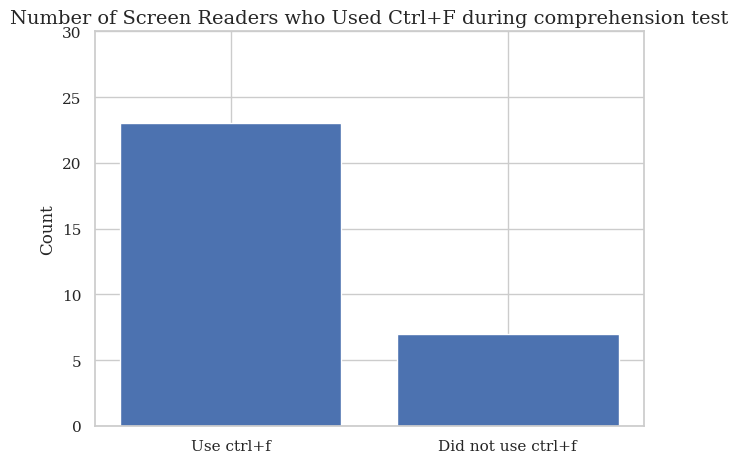

In [73]:
ctrlf_count = df[df['format'] == 'Screen']['ctrlf'].value_counts().reset_index()
plt.bar(ctrlf_count['ctrlf'], ctrlf_count['count'])
plt.xticks(
    ticks=range(2),
    labels=['Use ctrl+f', 'Did not use ctrl+f']
)
plt.ylabel("Count")
plt.title("Number of Screen Readers who Used Ctrl+F during comprehension test")
plt.tight_layout()
plt.ylim(0,30)
plt.show()

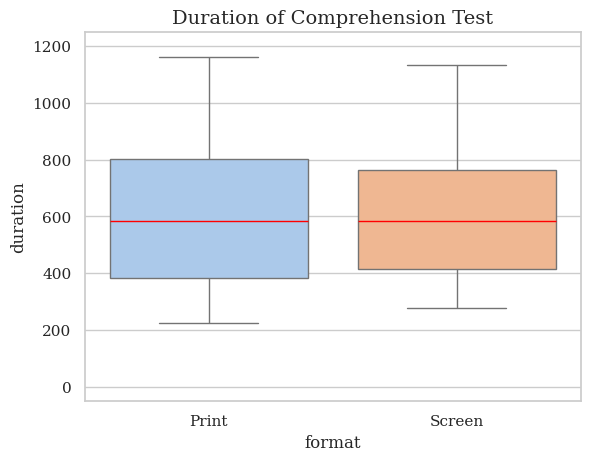

In [74]:
sns.boxplot(x='format', y='duration', hue='format', data=df[['format', 'duration']], palette='pastel', medianprops={'color': 'red'})
plt.ylim(-50, 1250)
plt.title("Duration of Comprehension Test")
plt.show()

Recall and Intepret Scores grouped according to format

In [75]:
compre_scores = df[['format', 'recall', 'interpret']]
compre_scores.groupby('format').describe().T

format               Print     Screen
recall    count  30.000000  30.000000
          mean    3.966667   4.233333
          std     0.808717   0.817200
          min     2.000000   2.000000
          25%     4.000000   4.000000
          50%     4.000000   4.000000
          75%     4.000000   5.000000
          max     5.000000   5.000000
interpret count  30.000000  30.000000
          mean    3.200000   3.100000
          std     1.186127   1.241523
          min     0.000000   0.000000
          25%     2.250000   2.000000
          50%     3.000000   3.000000
          75%     4.000000   4.000000
          max     5.000000   5.000000

In [76]:
compre_scores.groupby('format').median()

,recall,interpret
format,,
Print,4.0,3.0
Screen,4.0,3.0


Recall and Intepret Scores no group

In [77]:
compre_scores.describe()

,recall,interpret
count,60.000000,60.000000
mean,4.100000,3.150000
std,0.817188,1.204863
min,2.000000,0.000000
25%,4.000000,2.000000
50%,4.000000,3.000000
75%,5.000000,4.000000
max,5.000000,5.000000


In [78]:
compre_scores.iloc[:,1:].median()

recall       4.0
interpret    3.0
dtype: float64

Recall and Interpret Sccores Visualization

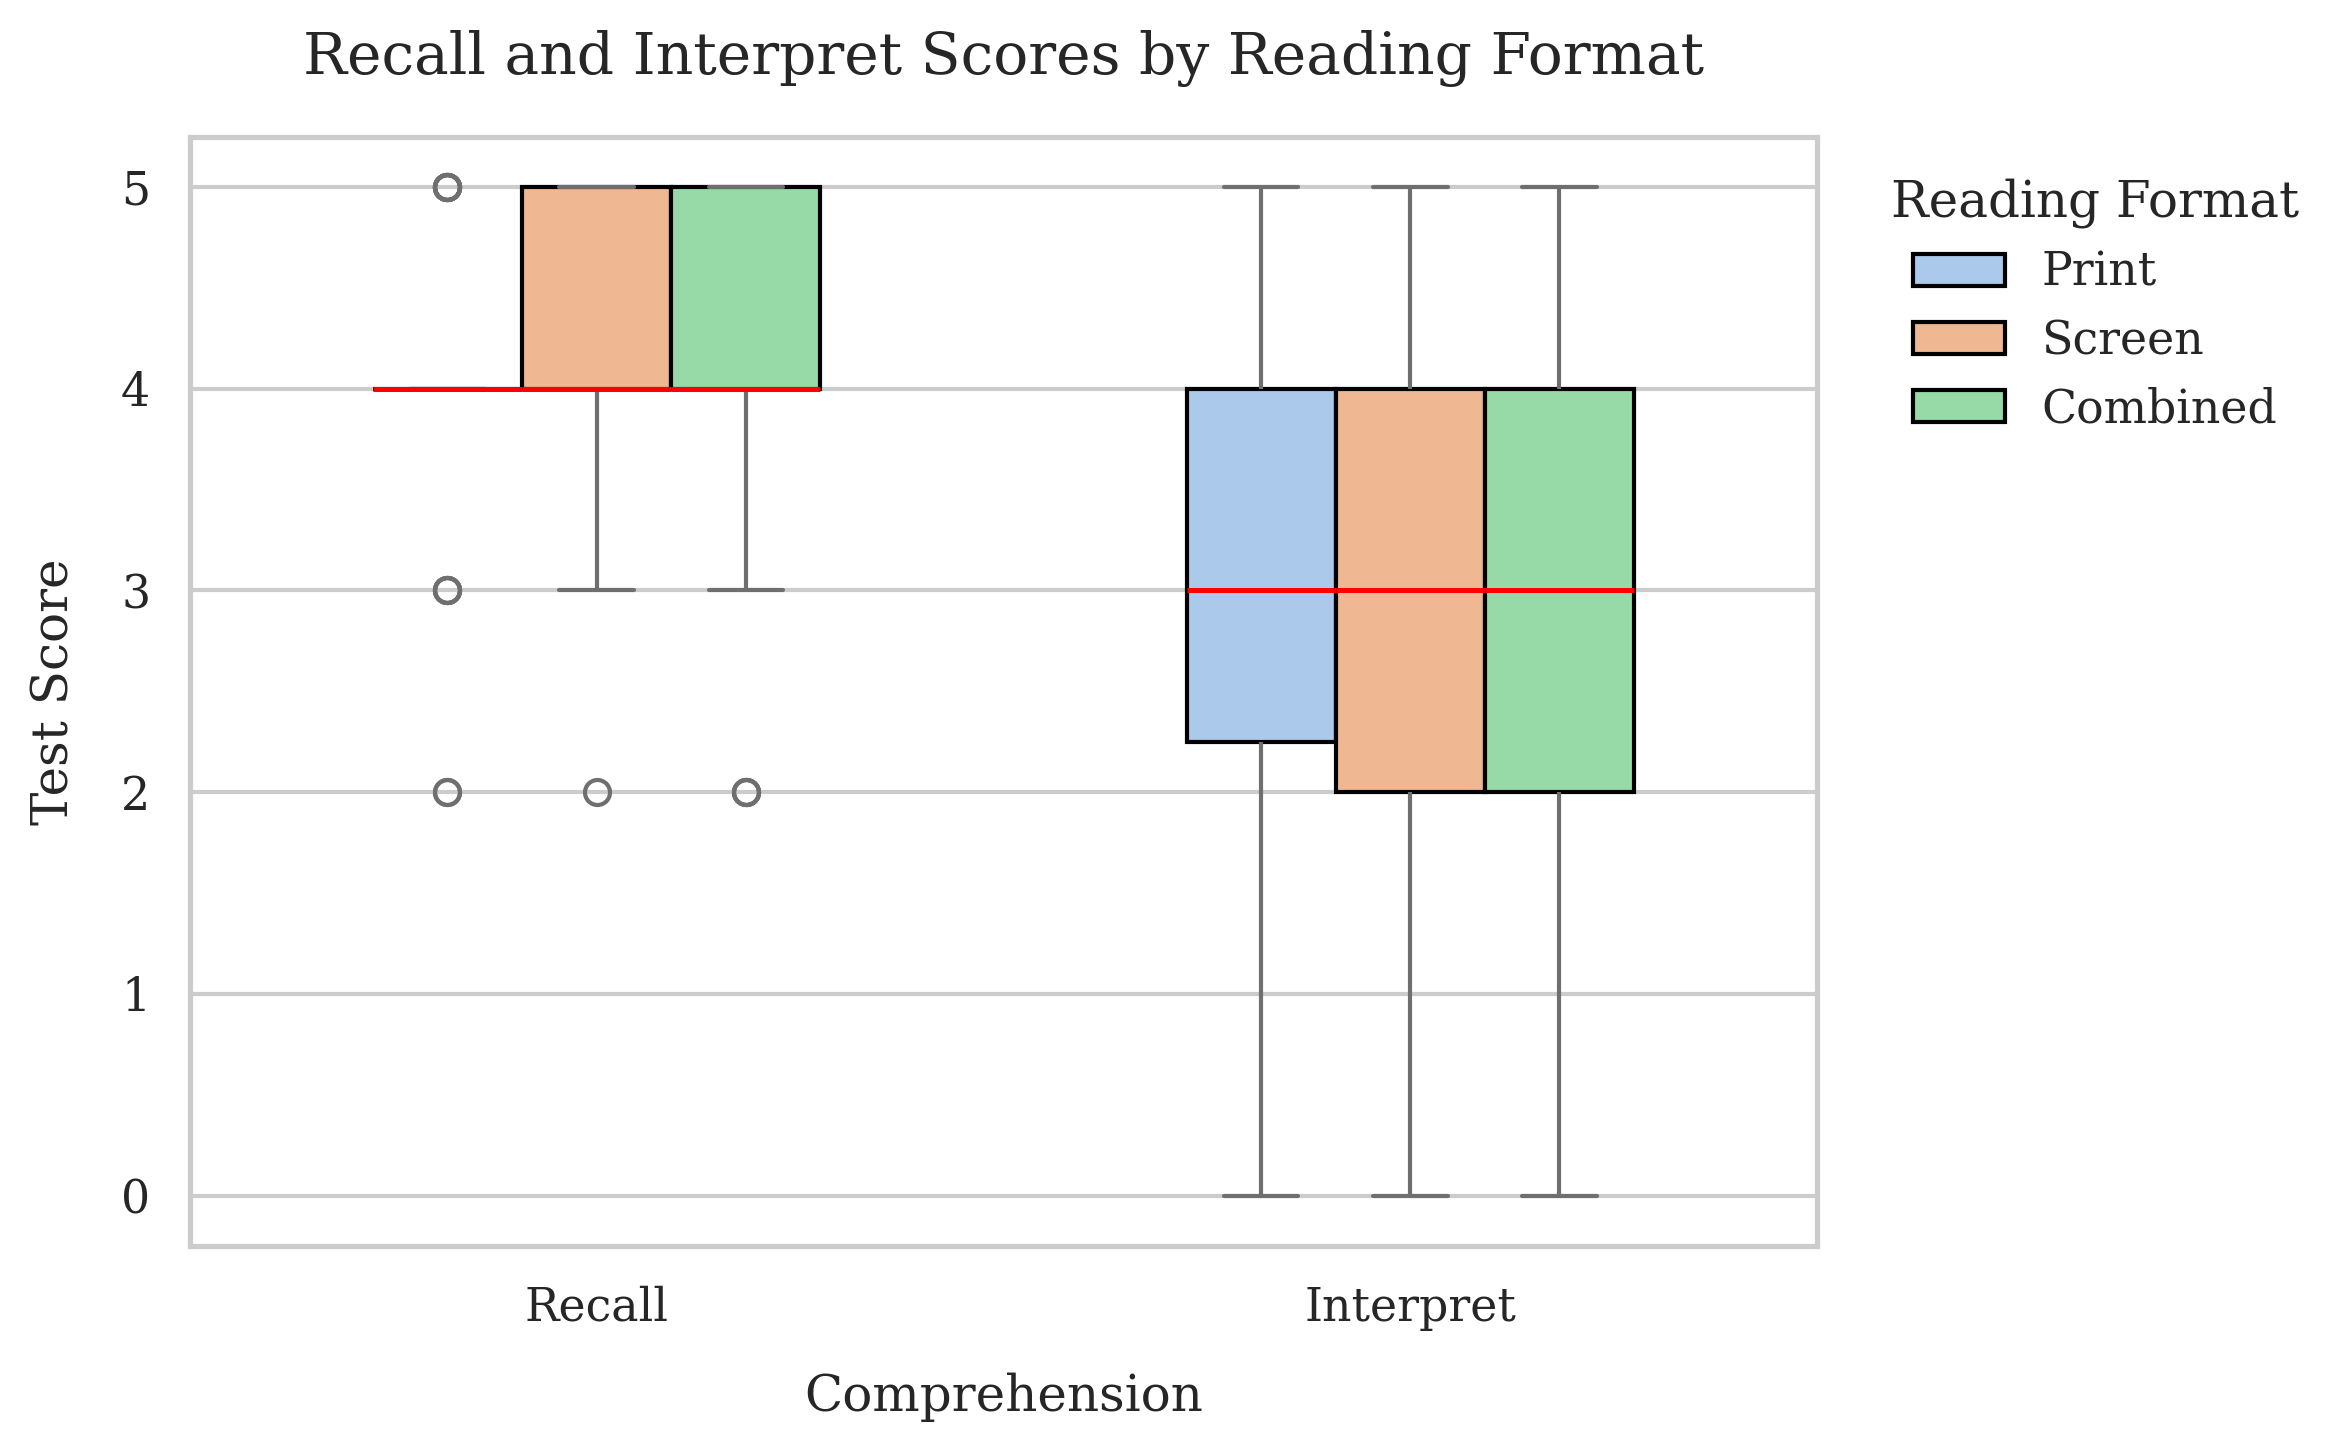

In [79]:
# --- Prepare data ---
compre_scores_long = df[['format', 'recall', 'interpret']].melt(
    id_vars=['format'], 
    value_vars=['recall', 'interpret'], 
    var_name='comprehension', 
    value_name='score'
)

# Add combined row for overall
compre_scores_long_2 = compre_scores_long.copy()
compre_scores_long_2['format'] = 'Combined'
compre_scores_long_combined = pd.concat([compre_scores_long, compre_scores_long_2])

# --- ACM CHI style ---
plt.figure(figsize=(8, 5), dpi=300)
sns.set_theme(style="whitegrid")

plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 14

pastel_colors = sns.color_palette("pastel")

# Boxplot
ax = sns.boxplot(
    x='comprehension',
    y='score',
    hue='format',
    data=compre_scores_long_combined,
    palette='pastel',
    medianprops={'color': 'red', 'linewidth': 1.2},
    boxprops={'edgecolor': 'black'},
    width=0.55
)

# --- Legend outside ---
plt.legend(
    title='Reading Format',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False
)

# Labels and title (plain serif)
plt.title('Recall and Interpret Scores by Reading Format', pad=15)
plt.ylabel('Test Score', labelpad=10)
plt.xlabel('Comprehension', labelpad=10)
plt.xticks(
    ticks=range(2),
    labels=['Recall', 'Interpret']
)

# Save figure in ACM CHI style
plt.tight_layout()
plt.savefig('recall_interpret.png', dpi=300, bbox_inches='tight')
plt.show()

Overall Compre grouped according to format

In [80]:
overall_compre = data=df[['format', 'compre']]
overall_compre.groupby('format').describe().T

format            Print     Screen
compre count  30.000000  30.000000
       mean    7.166667   7.333333
       std     1.723736   1.688365
       min     3.000000   3.000000
       25%     6.250000   6.000000
       50%     7.000000   8.000000
       75%     8.000000   9.000000
       max    10.000000  10.000000

In [81]:
overall_compre.groupby('format').median()

,compre
format,
Print,7.0
Screen,8.0


Overall Compre no group

In [82]:
overall_compre.describe()

,compre
count,60.000000
mean,7.250000
std,1.693707
min,3.000000
25%,6.000000
50%,7.500000
75%,8.250000
max,10.000000


In [83]:
overall_compre['compre'].median()

np.float64(7.5)

Overall Comprehension Visualization

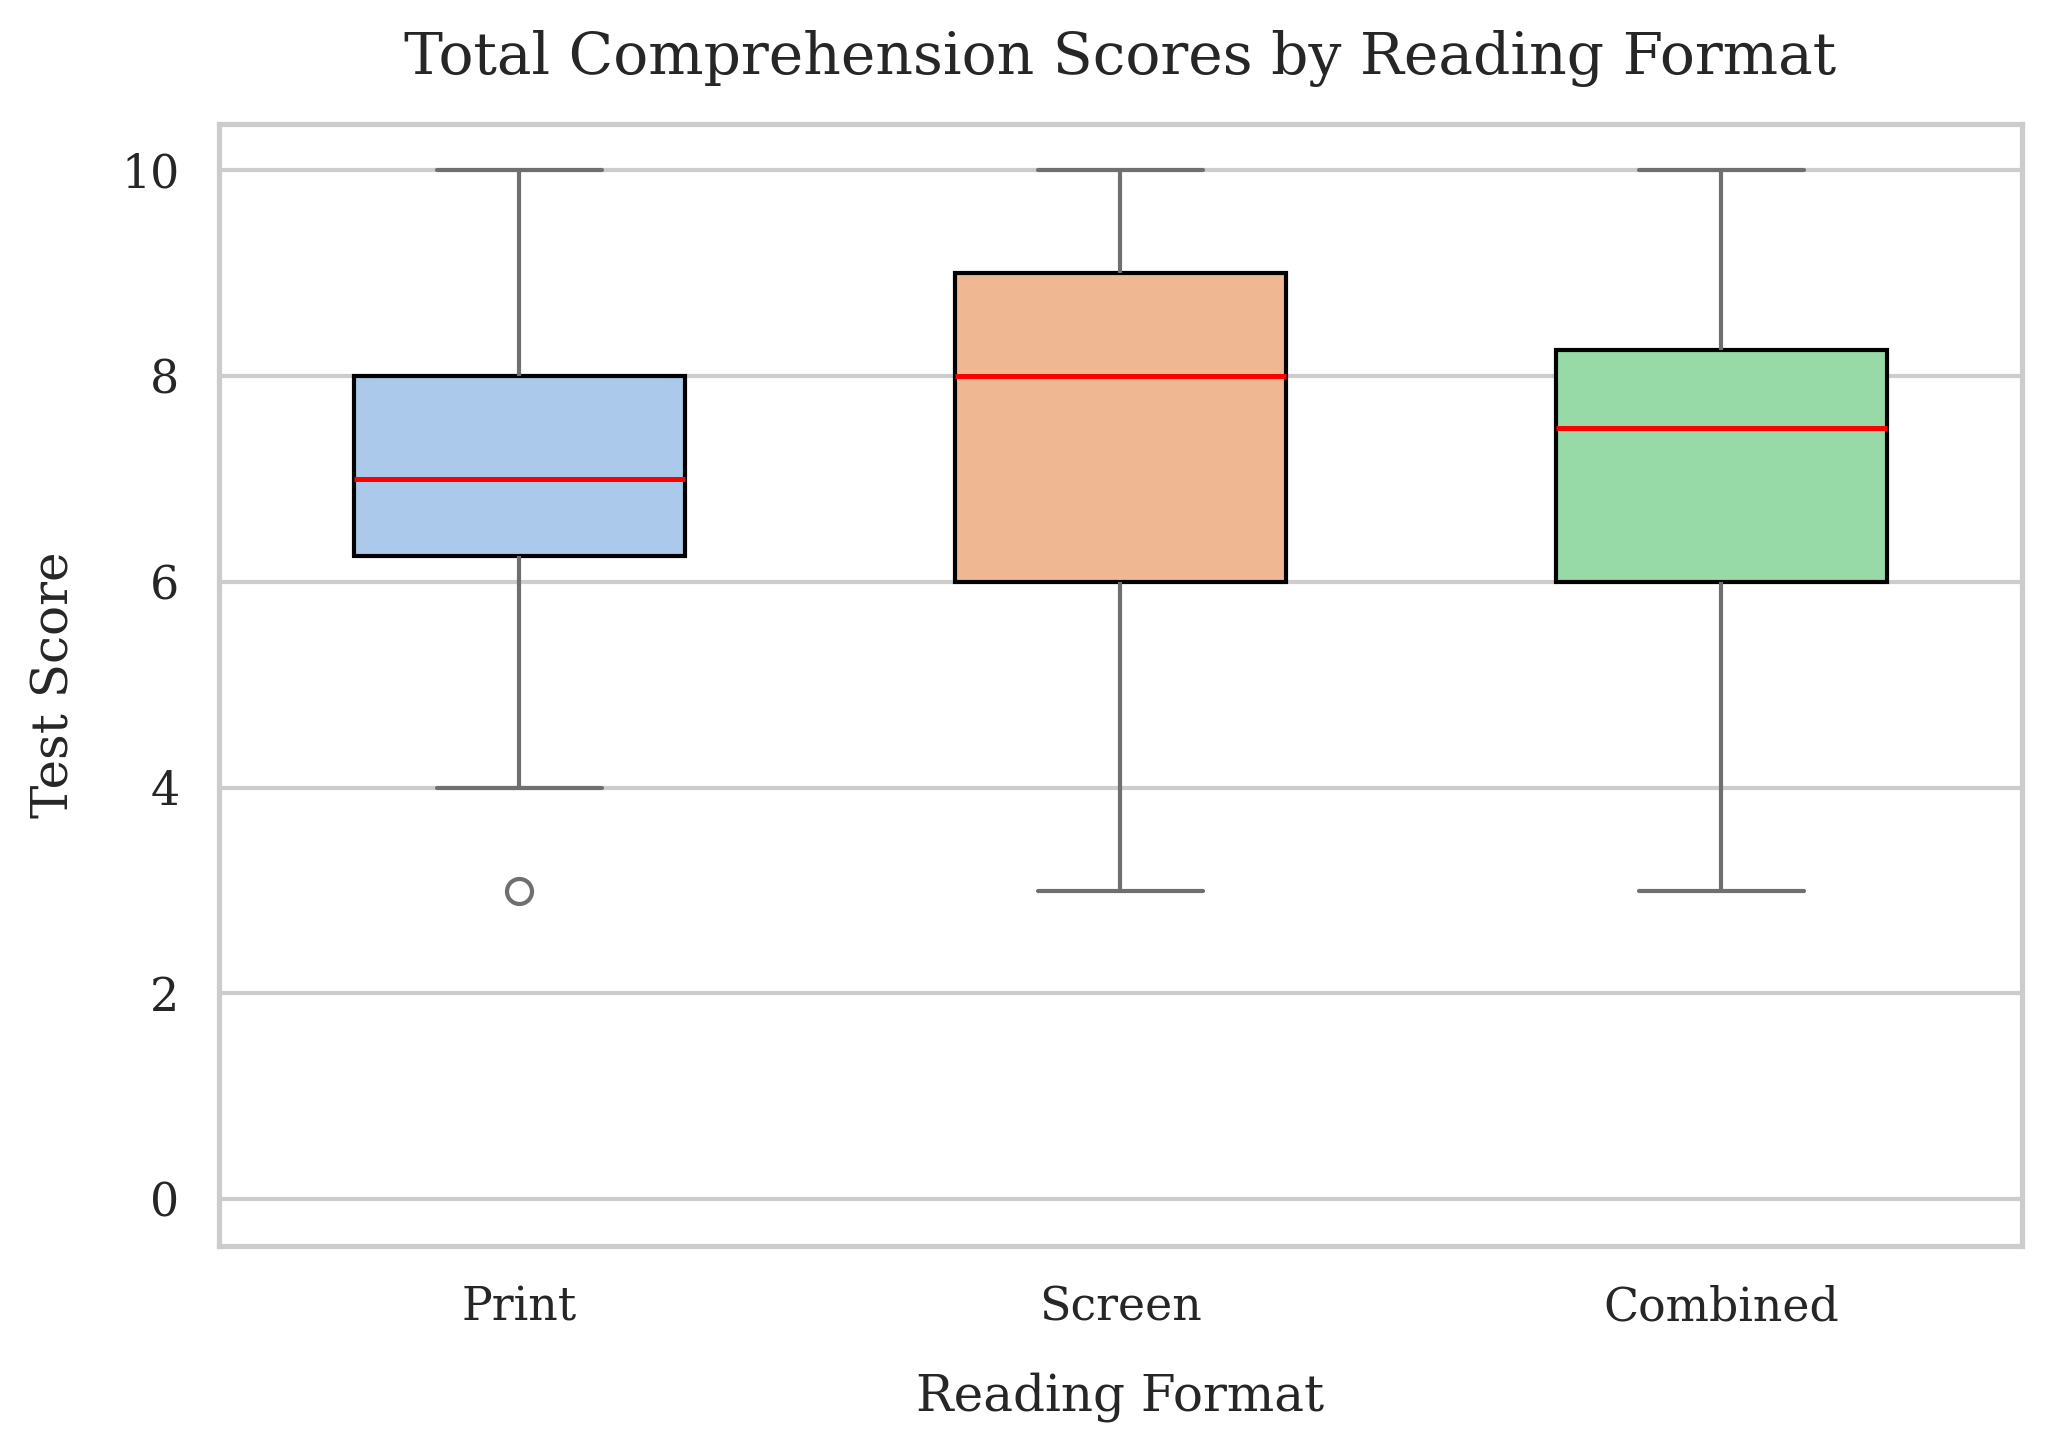

In [84]:
# --- Prepare data ---
overall_compre_2 = overall_compre.copy()
overall_compre_2['format'] = 'Combined'
overall_compre_combined = pd.concat([overall_compre, overall_compre_2])

# --- ACM CHI style ---
plt.figure(figsize=(7, 5), dpi=300)
sns.set_theme(style="whitegrid")

plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 14

# Boxplot
ax = sns.boxplot(
    x='format',
    y='compre',
    hue='format',
    data=overall_compre_combined,
    palette='pastel',
    medianprops={'color': 'red', 'linewidth': 1.2},
    boxprops={'edgecolor': 'black'},
    width=0.55
)

# Labels and title (plain serif)
plt.title('Total Comprehension Scores by Reading Format', pad=12)
plt.ylabel('Test Score', labelpad=10)
plt.xlabel('Reading Format', labelpad=10)

# Y-axis limits
plt.ylim(-0.45, 10.45)

# Save figure in CHI style
plt.tight_layout()
plt.savefig('compre_scores.png', dpi=300, bbox_inches='tight')
plt.show()

Lookback grouped according to format

In [85]:
df['lb'].describe()

count    60.000000
mean     10.283333
std      10.473682
min       0.000000
25%       2.000000
50%       7.000000
75%      14.250000
max      41.000000
Name: lb, dtype: float64

In [86]:
df['lb'].median()

np.float64(7.0)

Lookback no grouping

In [87]:
df[['format', 'lb']].groupby('format').describe().T

format        Print     Screen
lb count  30.000000  30.000000
   mean   10.966667   9.600000
   std    12.471992   8.164684
   min     0.000000   1.000000
   25%     2.000000   4.000000
   50%     3.500000   8.500000
   75%    17.500000  12.000000
   max    41.000000  40.000000

In [88]:
df[['format', 'lb']].groupby('format').median()

,lb
format,
Print,3.5
Screen,8.5


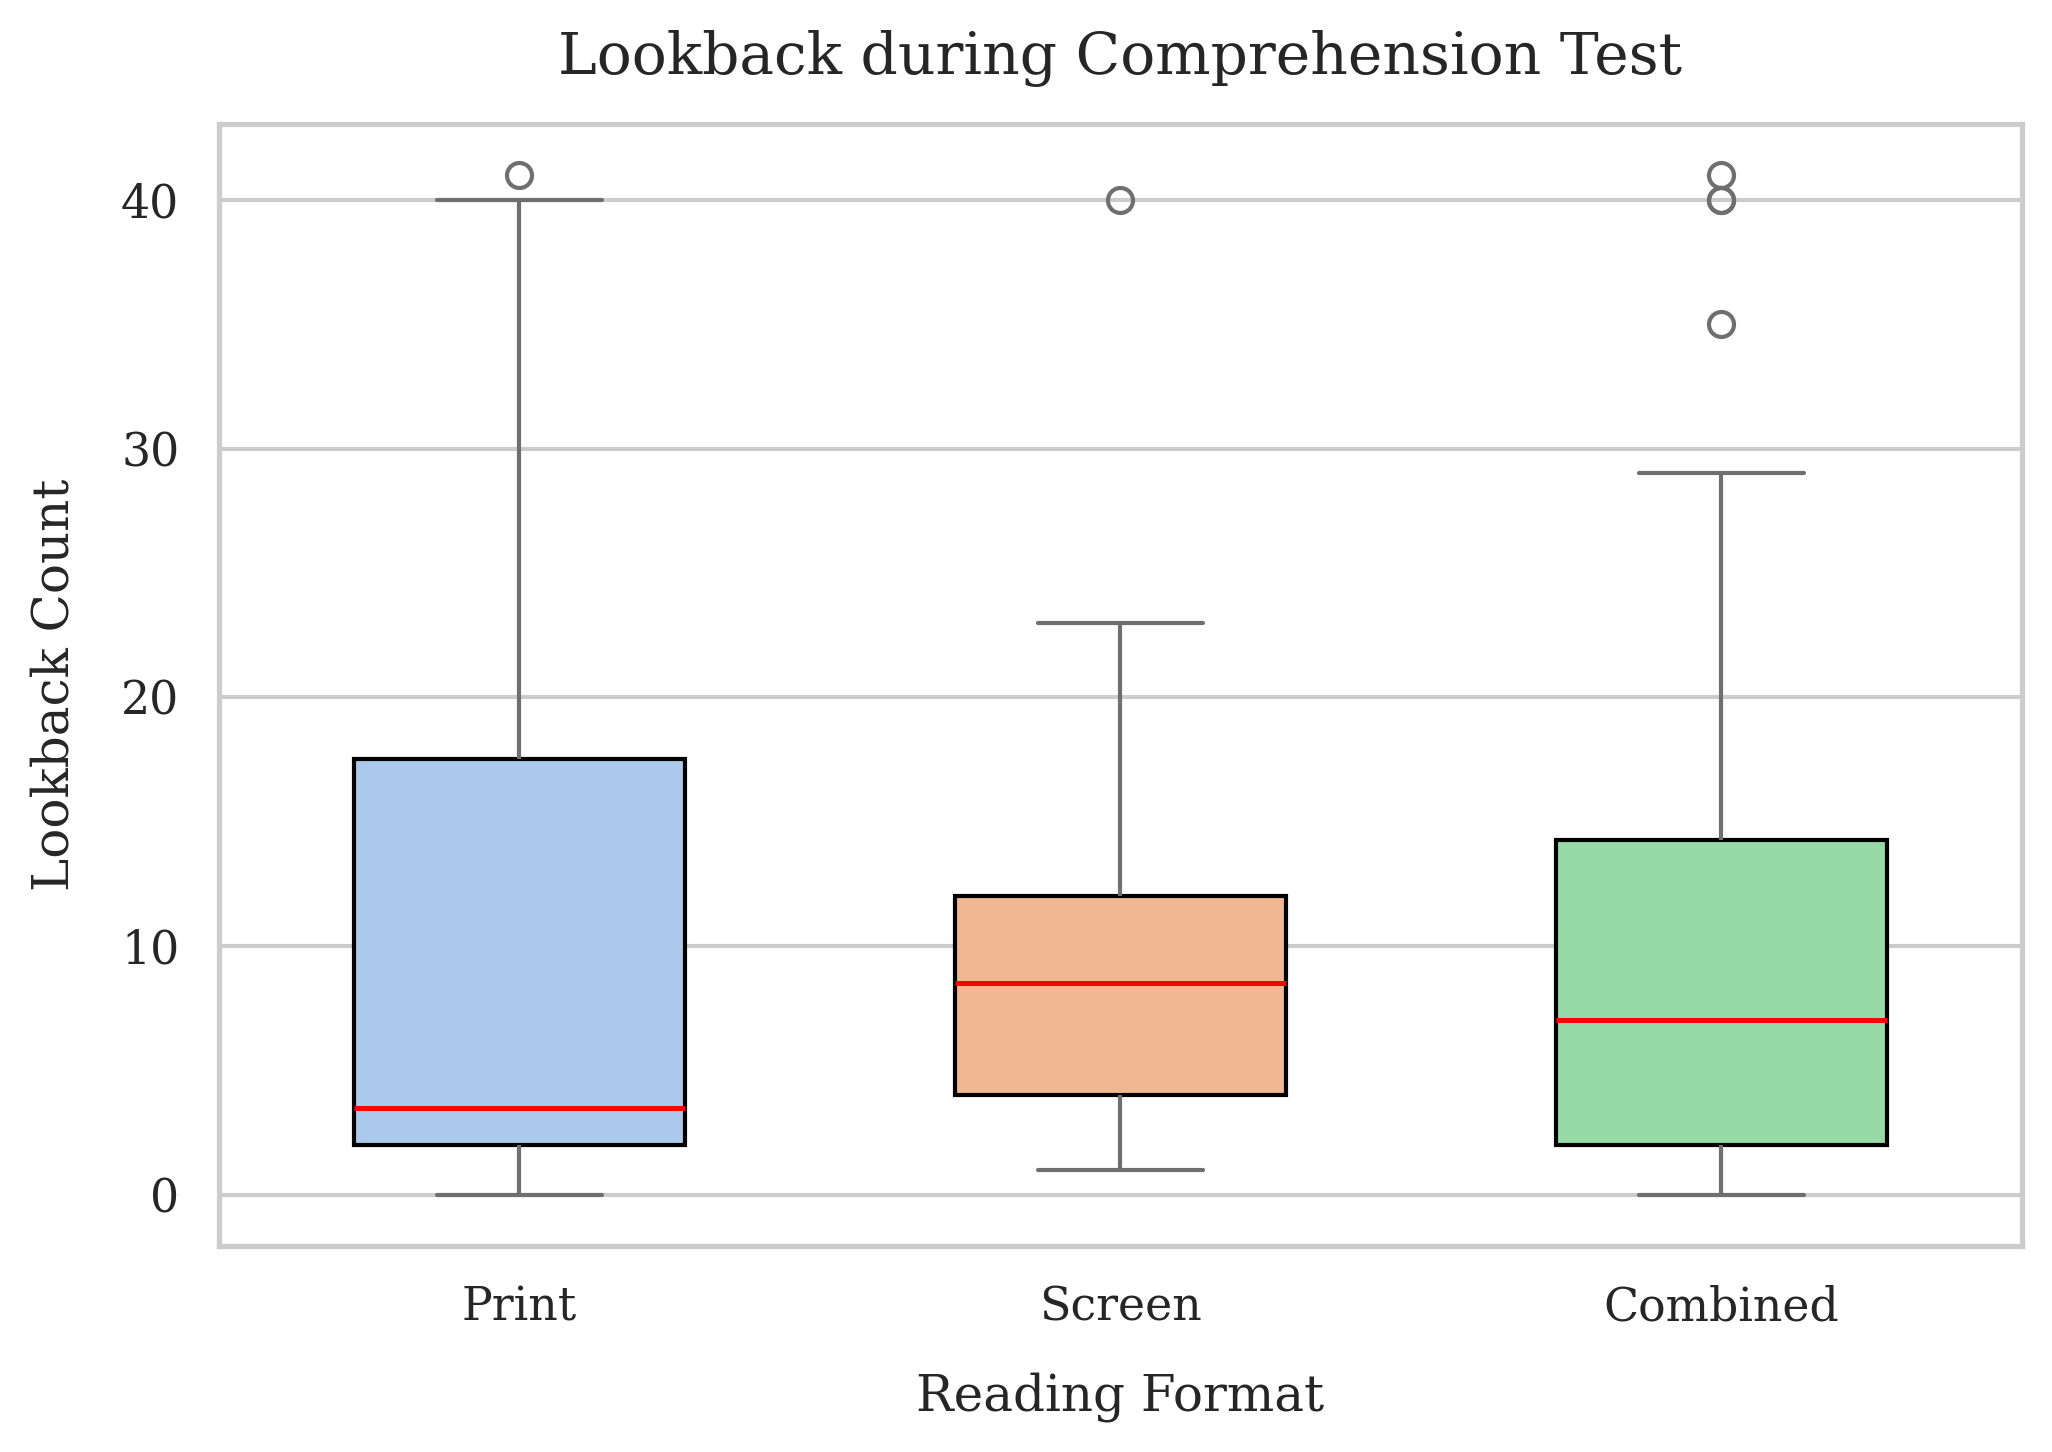

In [90]:
# --- Prepare data ---
lb_2 = df[['format', 'lb']].copy()
lb_2['format'] = 'Combined'
lb_combined = pd.concat([df[['format', 'lb']], lb_2])

# --- ACM CHI style ---
plt.figure(figsize=(7, 5), dpi=300)
sns.set_theme(style="whitegrid")

plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 14

# Boxplot
ax = sns.boxplot(
    x='format',
    y='lb',
    hue='format',
    data=lb_combined,
    palette='pastel',
    medianprops={'color': 'red', 'linewidth': 1.2},
    boxprops={'edgecolor': 'black'},
    width=0.55
)

# Labels and title (plain serif)
plt.title('Lookback during Comprehension Test', pad=12)
plt.ylabel('Lookback Count', labelpad=10)
plt.xlabel('Reading Format', labelpad=10)

# Save figure in CHI style
plt.tight_layout()
plt.savefig('lookback.png', dpi=300, bbox_inches='tight')
plt.show()

# Statistical Tests

In [91]:
def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = np.mean(d1), np.mean(d2)
	# calculate the effect size
	return (u1 - u2) / s

def rankbiserial(d1, d2, U):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the means of the samples
    u1, u2 = np.mean(d1), np.mean(d2)
    
    return 1-((2*U)/(n1*n2))

## Prerequisites Test

In [92]:
df_inf = df[[col for col in df.columns if ('arq' not in col) and ('qual' not in col) and ('college' not in col)]]
df_inf = pd.concat([df[['format']], arq_median_samp[['learn_engage', 'format_behave', 'arq_overall']], df_inf.iloc[:,3:-5], df_inf.iloc[:,-5:-2]], axis=1)
df_inf.to_excel('quanti_vals.xlsx')

No Group Normality

In [93]:
stats, pvals = shapiro(df_inf.iloc[:,1:], axis=0)
normality_no_gr = pd.DataFrame({'variable': list(df_inf.columns)[1:], 'p-value': pvals})

normality_no_gr['test'] = normality_no_gr['p-value'].apply(lambda x: 'Parametric' if x > 0.05 else 'Non-Parametric')

normality_no_gr

,variable,p-value,test
0,learn_engage,7.368178e-02,Parametric
1,format_behave,2.566860e-01,Parametric
2,arq_overall,3.129714e-01,Parametric
3,md,4.091460e-02,Non-Parametric
4,pd,4.777416e-06,Non-Parametric
5,td,7.184324e-02,Parametric
6,pf,4.092961e-04,Non-Parametric
7,ef,2.297856e-02,Non-Parametric
8,fr,5.447380e-04,Non-Parametric
9,recall,3.896624e-07,Non-Parametric


Grouped Normality

In [94]:
stats, pvals = shapiro(df_inf[df_inf['format'] == 'Print'].iloc[:, 1:], axis=0)
print_normality = pd.DataFrame({"variable":list(df_inf.columns)[1:], "shapiro": pvals})

stats, pvals = shapiro(df_inf[df_inf['format'] == 'Screen'].iloc[:, 1:], axis=0)
screen_normality = pd.DataFrame({"variable":list(df_inf.columns)[1:], "shapiro": pvals})

normality = pd.merge(print_normality, screen_normality, on='variable')
normality.columns = ['variable', 'print_shapiro', 'screen_shapiro']

normality['test stat'] = normality[['print_shapiro', 'screen_shapiro']].apply(
    lambda x: 'Parametric' 
    if (x['print_shapiro'] >= 0.05) & (x['screen_shapiro'] >= 0.05)
    else 'Non-Parametric', 
    axis=1
)

normality

,variable,print_shapiro,screen_shapiro,test stat
0,learn_engage,0.253215,0.186460,Parametric
1,format_behave,0.408735,0.466288,Parametric
2,arq_overall,0.375580,0.609876,Parametric
3,md,0.057488,0.092494,Parametric
4,pd,0.001376,0.000502,Non-Parametric
5,td,0.717629,0.165485,Parametric
6,pf,0.003058,0.042071,Non-Parametric
7,ef,0.468324,0.026312,Non-Parametric
8,fr,0.001996,0.054298,Non-Parametric
9,recall,0.000129,0.000078,Non-Parametric


In [95]:
normality.to_latex("table.tex", index=False)

In [96]:
ps = []
cols = ['learn_engage', 'format_behave', 'arq_overall', 'md', 'td']
for each in cols:
    stat, p = levene(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], center='mean')
    ps.append(p)
equality_var = pd.DataFrame({'variable':['Learning & Engagement', 'Format & Behavior', 'ARQ Overall', 'Mental Demand', 'Temporal Demand'], 'p-value':ps})
equality_var['T-test Type'] = equality_var['p-value'].apply(lambda x: 'Pooled' if x > 0.05 else 'Welch')
equality_var.to_latex('equality_var.tex', index=False)

## Difference on ARQ between groups

Equality of Variance Test (Levene's Test)

In [97]:
ts = []
ps = []
mu1s = []
mu2s = []
st1s = []
st2s = []
cols = list(df_inf.columns)[1:4]
for each in cols:
    stat, p = levene(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], center='mean')
    ts.append(stat)
    ps.append(p)
levene_arq_df = pd.DataFrame({'variable': cols, 'p-value':ps})
levene_arq_df['interpretation'] = levene_arq_df['p-value'].apply(lambda x: 'equal variance' if x > 0.05 else 'not equal variance')
levene_arq_df

,variable,p-value,interpretation
0,learn_engage,0.632183,equal variance
1,format_behave,0.369246,equal variance
2,arq_overall,0.801218,equal variance


Actual Test

In [98]:
ts = []
ps = []
ds = []
mu1s = []
mu2s = []
st1s = []
st2s = []
cols = list(df_inf.columns)[1:4]
for each in cols:
    mu1, mu2 = float(df_inf[df_inf['format'] == 'Print'][each].mean()), float(df_inf[df_inf['format'] == 'Screen'][each].mean())
    mu1s.append(round(mu1, 2))
    mu2s.append(round(mu2, 2))
    st1, st2 = float(df_inf[df_inf['format'] == 'Print'][each].std()), float(df_inf[df_inf['format'] == 'Screen'][each].std())
    st1s.append(round(st1, 2))
    st2s.append(round(st2, 2))
    stat, p = ttest_ind(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], equal_var=True)
    d = cohend(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each])
    ts.append(str(round(stat, 3)))
    ps.append(str(round(p, 3)))
    ds.append(str(round(d, 3)))
results = pd.DataFrame({'variable': cols, 'mean_print': mu1s, 'sd_print': st1s, 'mean_screen': mu2s, 'sd_screen':st2s, 't': ts, 'p': ps})
results.to_latex('arq_diff.tex', index=False)
results.iloc[:,:]

,variable,mean_print,sd_print,mean_screen,sd_screen,t,p
0,learn_engage,0.33,0.86,0.23,0.90,0.439,0.663
1,format_behave,-0.44,0.88,-0.44,0.76,-0.0,1.0
2,arq_overall,-0.17,0.82,-0.20,0.76,0.175,0.861


## Difference on NASA-TLX between groups

Equality of Variance Test (Levene's Test) on MD, TD

In [99]:
ps = []
cols = ['md', 'td']
means = []
for each in cols:
    stat, p = levene(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], center='mean')
    ps.append(p)
levene_arq_df = pd.DataFrame({'variable': cols, 'p-value':ps})
levene_arq_df['interpretation'] = levene_arq_df['p-value'].apply(lambda x: 'equal variance' if x > 0.05 else 'not equal variance')
levene_arq_df

,variable,p-value,interpretation
0,md,0.232588,equal variance
1,td,0.515237,equal variance


Actual Test

In [100]:
stats = []
ps = []
effects = []
mu1s = []
mu2s = []
st1s = []
st2s = []
mean_rank_1 = []
mean_rank_2 = []
cols = list(df_inf.columns)[4:10]
for each in cols:
    if each in ['md', 'td']:
        stat, p = ttest_ind(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], equal_var=True)
        mu1, mu2 = float(df_inf[df_inf['format'] == 'Print'][each].mean()), float(df_inf[df_inf['format'] == 'Screen'][each].mean())
        st1, st2 = float(df_inf[df_inf['format'] == 'Print'][each].std()), float(df_inf[df_inf['format'] == 'Screen'][each].std())
        d = cohend(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each])
        effects.append('d='+str(d))
        stats.append('t='+str(stat))
        mu1s.append(mu1)
        mu2s.append(mu2)
        st1s.append(st1)
        st2s.append(st2)
        mean_rank_1.append('-')
        mean_rank_2.append('-')
    else: 
        stat, p = mannwhitneyu(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], method='exact')
        r = rankbiserial(df_inf[df_inf['format'] == 'Print'][each], df_inf[df_inf['format'] == 'Screen'][each], stat)
        effects.append('r='+str(r))
        stats.append('U='+str(stat))
        mu1s.append('-')
        mu2s.append('-')
        st1s.append('-')
        st2s.append('-')
        # Extract groups
        g1 = df_inf[df_inf['format'] == 'Print'][each].dropna()
        g2 = df_inf[df_inf['format'] == 'Screen'][each].dropna()

        # Compute mean ranks
        combined = pd.concat([g1, g2], ignore_index=True)
        ranks = rankdata(combined)  # assigns ranks 1..N
        
        mean_rank_1.append(ranks[:len(g1)].mean())
        mean_rank_2.append(ranks[len(g1):].mean())
        
    ps.append(p)

results = pd.DataFrame({
    'variable':cols, 
    'mean_print':mu1s, 
    'std_print':st1s, 
    'mean_screen':mu2s, 
    'std_screen':st2s, 
    'mean_rank_print':mean_rank_1,
    'mean_rank_screen':mean_rank_2,
    'stat': stats, 
    'p-value': ps, 
    'effect': effects
})
results.to_latex('NASA_dff.tex', index=False)
results

,variable,mean_print,std_print,mean_screen,std_screen,mean_rank_print,mean_rank_screen,stat,p-value,effect
0,md,63.833333,24.589153,58.333333,18.815499,-,-,t=0.9729564662631356,0.334615,d=0.25121627936146285
1,pd,-,-,-,-,31.0,30.0,U=465.0,0.831500,r=-0.03333333333333344
2,td,45.833333,24.951102,45.833333,26.590228,-,-,t=0.0,1.000000,d=0.0
3,pf,-,-,-,-,32.116667,28.883333,U=498.5,0.485300,r=-0.10777777777777775
4,ef,-,-,-,-,30.433333,30.566667,U=448.0,0.982441,r=0.004444444444444473
5,fr,-,-,-,-,28.6,32.4,U=393.0,0.406289,r=0.1266666666666667


## Difference on Comprehension between groups

In [101]:
stats = []
ps = []
effects = []
mean_rank_print = []
mean_rank_screen = []

cols = list(df_inf.columns)[-4:]

for each in cols:
    # Extract groups
    g1 = df_inf[df_inf['format'] == 'Print'][each].dropna()
    g2 = df_inf[df_inf['format'] == 'Screen'][each].dropna()

    # Mann–Whitney test
    stat, p = mannwhitneyu(g1, g2, method='exact')

    # Effect size (rank biserial)
    r = rankbiserial(g1, g2, stat)
    effects.append(r)

    stats.append(stat)
    ps.append(p)

    # Compute mean ranks
    combined = pd.concat([g1, g2], ignore_index=True)
    ranks = rankdata(combined)  # assigns ranks 1..N

    mean_rank_print.append(ranks[:len(g1)].mean())
    mean_rank_screen.append(ranks[len(g1):].mean())


results = pd.DataFrame({'variable':cols, 'mean rank print':mean_rank_print,'mean rank screen':mean_rank_screen, 'stat': stats, 'p-value': ps})
results.to_latex('comprehension.tex', index=False)
results

,variable,mean rank print,mean rank screen,stat,p-value
0,interpret,30.833333,30.166667,460.0,0.889136
1,compre,29.500000,31.500000,420.0,0.664981
2,lb,29.066667,31.933333,407.0,0.532498
3,duration,30.616667,30.383333,453.5,0.970739


## Correlation

No Grouping

In [102]:
stats, p_corr_no_group = spearmanr(df_inf.iloc[:,1:])
cols = list(df_inf.iloc[:,1:].columns)
stats = np.round(stats, 3)
corr_no_group = pd.DataFrame(stats, index=cols, columns=cols).iloc[:3,3:-1]
p_corr_no_group = p_corr_no_group[:3,3:-1]

For Print Group

In [103]:
stats, p_corr_print_group = spearmanr(df_inf[df_inf['format']=='Print'].iloc[:,1:])
cols = list(df_inf.iloc[:,1:].columns)
stats = np.round(stats, 3)
corr_print_group = pd.DataFrame(stats, index=cols, columns=cols).iloc[:3,3:-1]
p_corr_print_group = p_corr_print_group[:3,3:-1]

For Screen Group

In [104]:
stats, p_corr_screen_group = spearmanr(df_inf[df_inf['format']=='Screen'].iloc[:,1:])
cols = list(df_inf.iloc[:,1:].columns)
stats = np.round(stats, 3)
corr_screen_group = pd.DataFrame(stats, index=cols, columns=cols).iloc[:3,3:-1]
p_corr_screen_group = p_corr_screen_group[:3,3:-1]

Visualization

In [124]:
corr_no_group_str = corr_no_group.copy().map(lambda x: f"{x:.3f}" if isinstance(x, (int,float)) and not pd.isna(x) else (x if isinstance(x, str) else 'nan')).to_numpy()
corr_print_group_str = corr_print_group.copy().map(lambda x: f"{x:.3f}" if isinstance(x, (int,float)) and not pd.isna(x) else (x if isinstance(x, str) else 'nan')).to_numpy()
corr_screen_group_str = corr_screen_group.copy().map(lambda x: f"{x:.3f}" if isinstance(x, (int,float)) and not pd.isna(x) else (x if isinstance(x, str) else 'nan')).to_numpy()

for i in range(corr_no_group_str.shape[0]):
    for j in range(corr_no_group_str.shape[1]):
        if p_corr_no_group[i][j] < 0.01:
            corr_no_group_str[i][j] += '**'
        elif p_corr_no_group[i][j] < 0.05:
            corr_no_group_str[i][j] += '*'

        if p_corr_print_group[i][j] < 0.01:
            corr_print_group_str[i][j] += '**'
        elif p_corr_print_group[i][j] < 0.05:
            corr_print_group_str[i][j] += '*'

        if p_corr_screen_group[i][j] < 0.001:
            corr_screen_group_str[i][j] += '**'
        elif p_corr_screen_group[i][j] < 0.05:
            corr_screen_group_str[i][j] += '*'

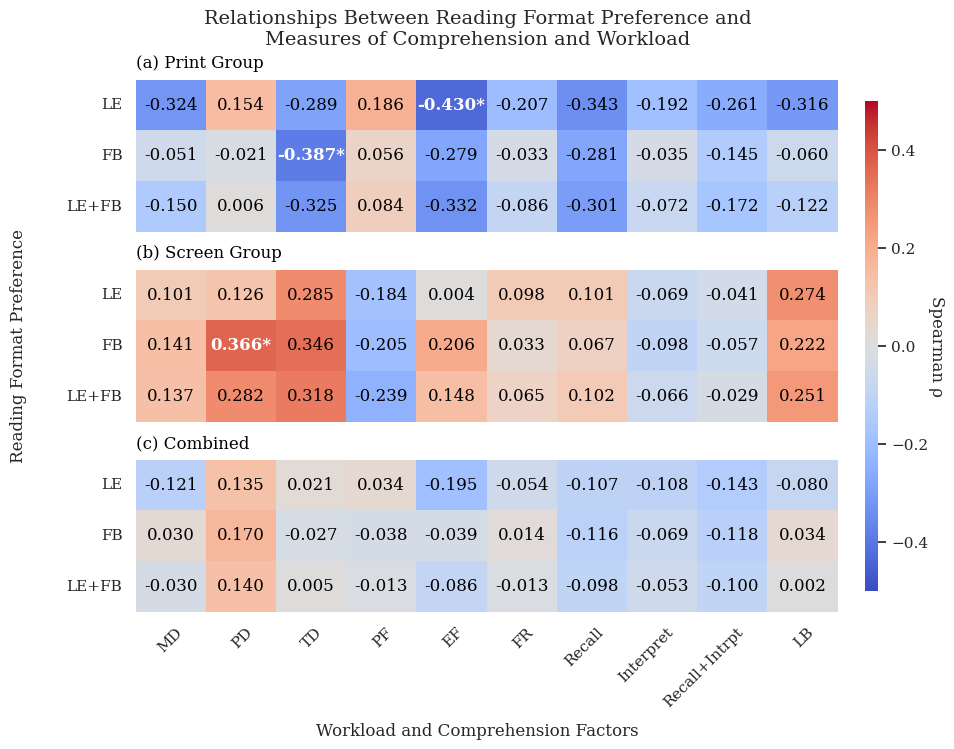

In [125]:
fig, axs = plt.subplots(
    nrows=3, ncols=1,
    figsize=(9, 7),
    sharex=True
)

plt.rcParams["font.family"] = "serif"
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 14

# Common vmin/vmax
vmin = -0.5
vmax = 0.5

panel_labels = ["(a) Print Group", "(b) Screen Group", "(c) Combined"]

# Plot heatmaps
heatmaps = [
    (corr_print_group, corr_print_group_str),
    (corr_screen_group, corr_screen_group_str),
    (corr_no_group, corr_no_group_str)
]

for i, ax in enumerate(axs):
    sns.heatmap(
        heatmaps[i][0],
        ax=ax,
        cmap="coolwarm",
        vmin=vmin, vmax=vmax,
        cbar=False,
        annot=heatmaps[i][1],
        fmt="",
        linewidths=0
    )

    # CHI-style panel label on the left
    ax.text(
        0.0, 1.05, panel_labels[i],
        transform=ax.transAxes,
        fontsize=12,
        va="bottom"
    )

    # Y-labels
    ax.set_yticks(np.arange(3) + 0.5)
    ax.set_yticklabels(['LE', 'FB', 'LE+FB'])
    
    for text in ax.texts:   # loop through annotation texts
        if "*" in text.get_text():   # if the annotation has * or **
            text.set_fontweight("bold")
            text.set_color('white')
        else:
            text.set_color("black")
            

# Bottom X-axis labels only
axs[2].set_xticks(np.arange(10) + 0.7)
axs[2].set_xticklabels(
    ['MD','PD','TD','PF','EF','FR','Recall','Interpret','Recall+Intrpt','LB'],
    rotation=45, ha='right'
)

# Unified colorbar (CHI-style: thin, uncluttered)
cbar_ax = fig.add_axes([0.93, 0.15, 0.015, 0.7])
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('Spearman ρ', rotation=270, labelpad=12)

# Remove colorbar box outline
for spine in cbar_ax.spines.values():
    spine.set_visible(False)

# Axis labels
fig.text(
    -0.01, 0.5,
    "Reading Format Preference",
    rotation=90,
    va="center", ha="center",
    fontsize=12
)

fig.text(
    0.5, -0.05,
    "Workload and Comprehension Factors",
    ha="center", va="center",
    fontsize=12
)

# CHI-style compact spacing
plt.subplots_adjust(hspace=0.25, right=0.9, left=0.12, bottom=0.12)
fig.suptitle(
    "Relationships Between Reading Format Preference and\nMeasures of Comprehension and Workload",
    fontsize=14,
    y=0.98,
)
plt.savefig('correlation.png', dpi=300, bbox_inches='tight')
plt.show()